In [100]:
#Read the input file
import pandas as pd
data=pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [101]:
#check the null values in dataset
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [102]:
#replace null values with mean or mode
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])

In [103]:
#recheck the null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [104]:
#Drop index column as not required
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


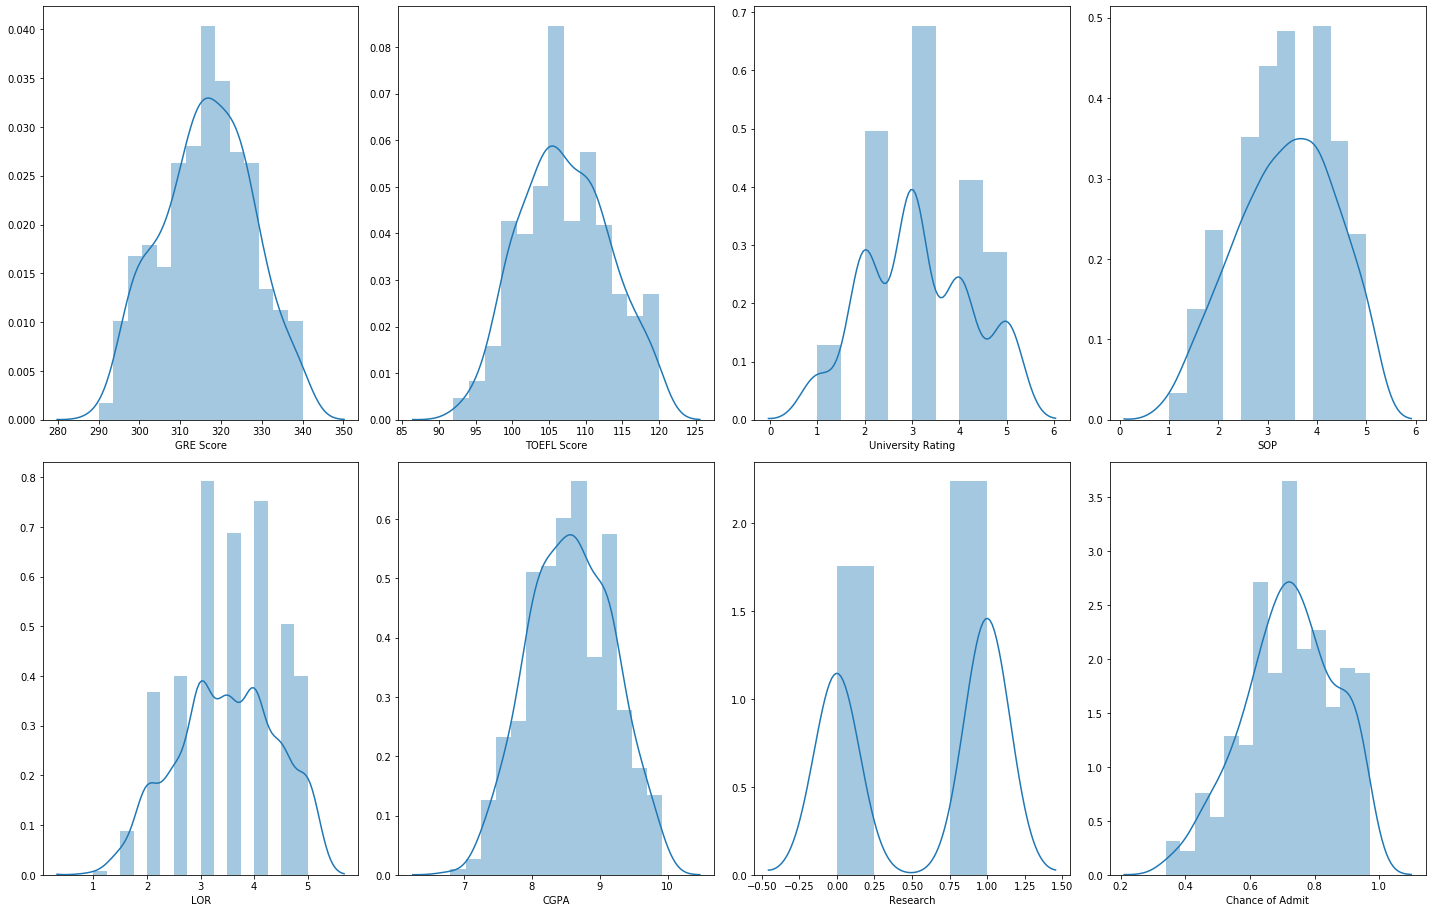

In [105]:
#create distribution plot for each column.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,25))   #to decide each figure size
plotnumber=1
for column in data:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()  #manage the spacing between plots

The data distribution looks decent enough and there doesn't seem to be any skewness.

In [108]:
#create x (independent variable list ) and y (dependent variable)
y=data['Chance of Admit']
x=data.drop('Chance of Admit',axis=1)

In [109]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [110]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

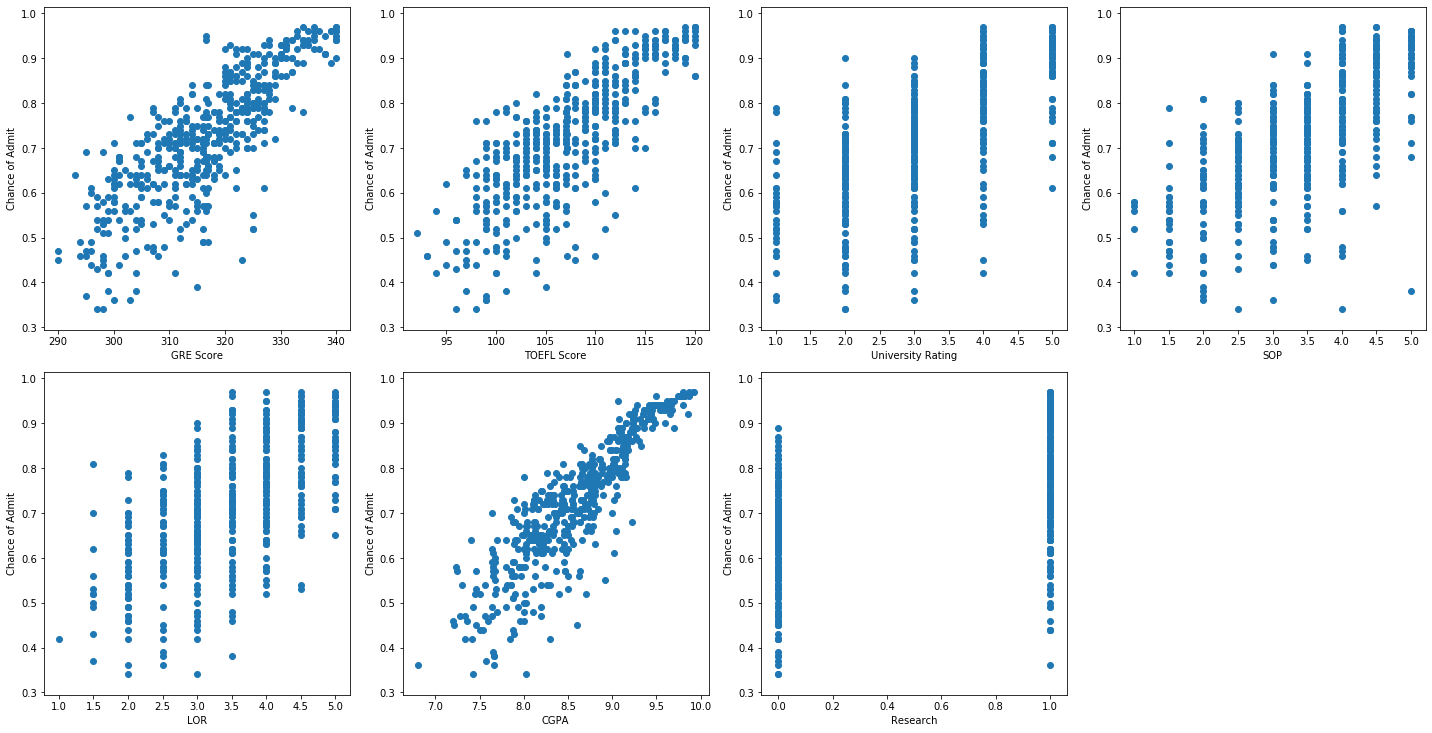

In [111]:
#Check the relationship between dependent and independent variable
plt.figure(figsize=(20,20))
plotnumber=1
for column in x:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Chance of Admit')
    plotnumber+=1
plt.tight_layout()
    

the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

In [112]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [132]:
#Check the multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=x_scaled
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['features']=x.columns

In [114]:
vif

,VIF,features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

In [115]:
#train_test data split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)

In [116]:
#create linear regression model
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
#check the score which is R square on train data
l.score(x_train,y_train)

0.8371440588106942

In [118]:
#function to calculate adjusted Rsquare
def adjusted_Rsquare(x,y):
    Rsquare=l.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_Rsquare=1-(((1-Rsquare)*(n-1))/(n-p-1))
    return(adj_Rsquare)

In [121]:
#check adjusted R square on train data
adjusted_Rsquare(x_train,y_train)

0.8340378147008164

Our r2 score is 83.71% and adj r2 is 83.40% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [122]:
#check the score which is R square on test data
l.score(x_test,y_test)

0.759344980750594

In [123]:
#check adjusted R square on test data
adjusted_Rsquare(x_test,y_test)

0.7449468172057577

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [134]:
#Check the accuracy using regularization
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassCV=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [135]:
# best alpha parameter
lassCV.alpha_

2.500378756025273e-05

In [126]:
lass=Lasso(lassCV.alpha_)
lass.fit(x_train,y_train)

Lasso(alpha=2.500378756025273e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
lass.score(x_test,y_test)

0.7593503497806683

our r2_score for test data (75.93%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [137]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
import numpy as np
alpha=np.random.uniform(low=0,high=10,size=(50,))
ridgeCV=RidgeCV(alphas=alpha,cv=10,normalize=True)
ridgeCV.fit(x_train,y_train)

C:\Users\kapasiya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([3.83129484, 7.36198554, 6.51832622, 7.90550488, 0.78112777,
       5.94795229, 4.18653038, 3.39346464, 2.32293157, 6.85574308,
       2.99347356, 6.15577318, 9.14146659, 4.98937486, 2.95969314,
       0.05002637, 3.15627435, 2.22003204, 2.36672075, 6.97596131,
       1.39714056, 1.3810323 , 1.91103272, 7.49661091, 6.64281913,
       4.46783393, 4.0275938 , 8.31329663, 0.19209096, 2.6543149 ,
       1.84095151, 3.84256255, 3.54078765, 9.29258328, 3.37023387,
       6.26422963, 6.82807438, 3.14610119, 7.3697683 , 2.21103653,
       1.01550964, 2.45125763, 7.35469646, 7.22728744, 1.50437069,
       3.77906535, 0.7156092 , 0.88827006, 5.13414691, 3.25396026]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [129]:
ridgeCV.alpha_

0.24173675575540288

In [130]:
ridge_model=Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.24173675575540288, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [131]:
ridge_model.score(x_test,y_test)

0.7594800027043971

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.